# CNN Model with 20% Validation Step
# CNN Model include Dropout, Batch Normalization, and Early Stopping

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_X = pd.read_csv('train.csv')
test_X = pd.read_csv('test.csv' )
train_X.drop(train_X.columns[train_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_X.drop(test_X.columns[test_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train_result = pd.read_csv('train_result.csv')
train_y_class = train_result['Class']

X_train = train_X.to_numpy()
X_test = test_X.to_numpy()
train_y = train_y_class.to_numpy()

print(train_y.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(50000, 1568)
(10000, 1568)


In [3]:
X_train, X_val, train_y, val_y = train_test_split(X_train, train_y,  test_size=0.20, random_state=101)

In [4]:
print(X_train.shape)
print(X_val.shape)
print(train_y.shape)
print(val_y.shape)

(40000, 1568)
(10000, 1568)
(40000,)
(10000,)


In [5]:
from tensorflow.keras.utils import to_categorical
c = len(np.unique(train_y))
y_train = to_categorical(train_y,c)
y_val = to_categorical(val_y,c)

In [6]:
#y_train
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X_train = X_train.reshape(40000, 28, 56, 1)
X_val = X_val.reshape(10000, 28, 56, 1)
X_test = X_test.reshape(10000, 28, 56, 1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(10000, 28, 56, 1)


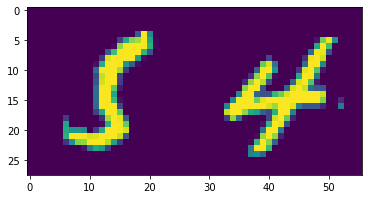

In [8]:
single_image = X_train[0]
plt.imshow(single_image)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [12]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
#model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
#Dropout Layer
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
#Dropout Layer
model.add(Dropout(0.3))

# FLATTEN IMAGES  BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(19, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 54, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 54, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 52, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 52, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                      

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40000, 28, 56, 1)
(10000, 28, 56, 1)
(40000, 19)
(10000, 19)


In [17]:
epochs=100
model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val, y_val),callbacks=[early_stop])

Epoch 1/100
1250/1250 [==============================] - 179s 141ms/step - loss: 2.3268 - accuracy: 0.2430 - val_loss: 1.4723 - val_accuracy: 0.5518
Epoch 2/100
1250/1250 [==============================] - 194s 155ms/step - loss: 1.5162 - accuracy: 0.4916 - val_loss: 0.6824 - val_accuracy: 0.8347
Epoch 3/100
1250/1250 [==============================] - 180s 144ms/step - loss: 1.0979 - accuracy: 0.6510 - val_loss: 0.3484 - val_accuracy: 0.9204
Epoch 4/100
1250/1250 [==============================] - 175s 140ms/step - loss: 0.8270 - accuracy: 0.7452 - val_loss: 0.2329 - val_accuracy: 0.9370
Epoch 5/100
1250/1250 [==============================] - 181s 144ms/step - loss: 0.6768 - accuracy: 0.7957 - val_loss: 0.1663 - val_accuracy: 0.9525
Epoch 6/100
1250/1250 [==============================] - 180s 144ms/step - loss: 0.5897 - accuracy: 0.8239 - val_loss: 0.1466 - val_accuracy: 0.9568
Epoch 7/100
1250/1250 [==============================] - 168s 134ms/step - loss: 0.5516 - accuracy: 0.8360

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
losses = pd.DataFrame(model.history.history)

In [20]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.326829,0.242950,1.472335,0.5518
1,1.516243,0.491650,0.682405,0.8347
2,1.097885,0.651050,0.348428,0.9204
3,0.827026,0.745175,0.232880,0.9370
4,0.676754,0.795650,0.166279,0.9525


<AxesSubplot:>

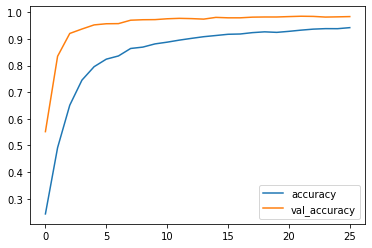

In [21]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

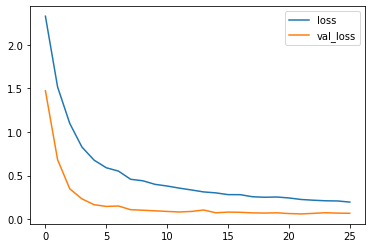

In [22]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

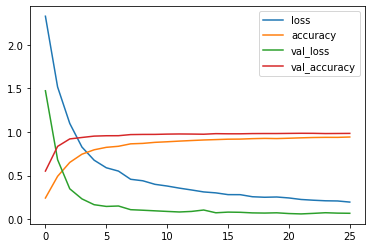

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [24]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.0678277388215065, 0.9836999773979187]


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
predictions = np.argmax(model.predict(X_val),axis=1)
predictions

313/313 [==============================] - 9s 27ms/step


array([ 6,  1, 15, ...,  1,  2,  3], dtype=int64)

In [27]:
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      1.00      0.99       202
           2       0.99      0.99      0.99       343
           3       0.98      0.99      0.99       439
           4       0.98      0.99      0.99       537
           5       0.98      0.98      0.98       597
           6       0.97      0.99      0.98       692
           7       0.98      0.99      0.99       817
           8       0.98      0.98      0.98       917
           9       0.99      0.98      0.99       987
          10       0.99      0.98      0.98       938
          11       0.99      0.98      0.98       762
          12       0.99      0.98      0.99       706
          13       0.98      0.98      0.98       578
          14       0.98      0.99      0.99       459
          15       0.98      0.99      0.98       367
          16       0.97      0.98      0.97       292
          17       0.99    

In [28]:
confusion_matrix = confusion_matrix(val_y,predictions)
confusion_matrix

array([[101,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0, 201,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1, 338,   3,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 436,   0,   1,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1, 534,   1,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 588,   4,   1,   1,   0,   1,   0,   0,
          0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 686,   1,   1,   0,   1,   2,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   2,   1, 810,   1,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0],
       [  1,   0,   1,   1,   1,   0,   5,   2, 898,   2,   2,   0,   0,
          2,   2,   0,   0,   0

In [29]:
#misclassification_error(confusion_matrix):
sum_preds = np.sum(confusion_matrix)
sum_correct = np.sum(np.diag(confusion_matrix))
misclassification_error = 1.0 - (float(sum_correct) / float(sum_preds))
    
print("sum_preds               :", int(sum_preds)) 
print("sum_correct_predictions :", int(sum_correct)) 
print("sum_wrong_predictions   :", int(sum_preds - sum_correct))
print("misclassification_error :", misclassification_error)

sum_preds               : 10000
sum_correct_predictions : 9837
sum_wrong_predictions   : 163
misclassification_error : 0.01629999999999998


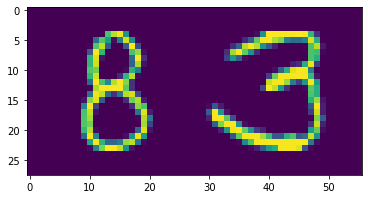

In [30]:
my_number = X_val[999]
plt.imshow(my_number)

In [31]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_number.reshape(1,28,56,1))

predict_x=model.predict(my_number.reshape(1,28,56,1)) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

1/1 [==============================] - 0s 24ms/step
[11]


In [32]:
print('\n')
print("Test Predictions")
test_predictions =  np.argmax(model.predict(X_test),axis=1)
print(test_predictions)
print(len(test_predictions))
print(type(test_predictions))
df = pd.DataFrame(test_predictions)
df.index.name= 'Index'
df.columns = ['Class']
file_name = f'test_predictions_cnn_model4-Dropout-batchnorm.csv'
df.to_csv(file_name, index=True)
df



Test Predictions
313/313 [==============================] - 8s 27ms/step
[14  7 10 ... 10  4  6]
10000
<class 'numpy.ndarray'>


,Class
Index,
0,14
1,7
2,10
3,7
4,5
...,...
9995,7
9996,12
9997,10
